In [1]:
import pandas as pd
data = pd.read_csv('sales.csv')

In [3]:
data.head()

,sale_id,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points
0,1,A,New York,Member,Male,Shampoo,Personal Care,5.50,3,1.16,17.66,1
1,2,B,Los Angeles,Normal,Female,Notebook,Stationery,2.75,10,1.93,29.43,0
2,3,A,New York,Member,Female,Apple,Fruits,1.20,15,1.26,19.26,1
3,4,A,Chicago,Normal,Male,Detergent,Household,7.80,5,2.73,41.73,0
4,5,B,Los Angeles,Member,Female,Orange Juice,Beverages,3.50,7,1.72,26.22,2


In [7]:
data.columns

Index(['sale_id', 'branch', 'city', 'customer_type', 'gender', 'product_name',
       'product_category', 'unit_price', 'quantity', 'tax', 'total_price',
       'reward_points'],
      dtype='object')

**Data pre-processing**

In [11]:
data.isnull().sum()

sale_id             0
branch              0
city                0
customer_type       0
gender              0
product_name        0
product_category    0
unit_price          0
quantity            0
tax                 0
total_price         0
reward_points       0
dtype: int64

In [15]:
data.dtypes

sale_id               int64
branch               object
city                 object
customer_type        object
gender               object
product_name         object
product_category     object
unit_price          float64
quantity              int64
tax                 float64
total_price         float64
reward_points         int64
dtype: object

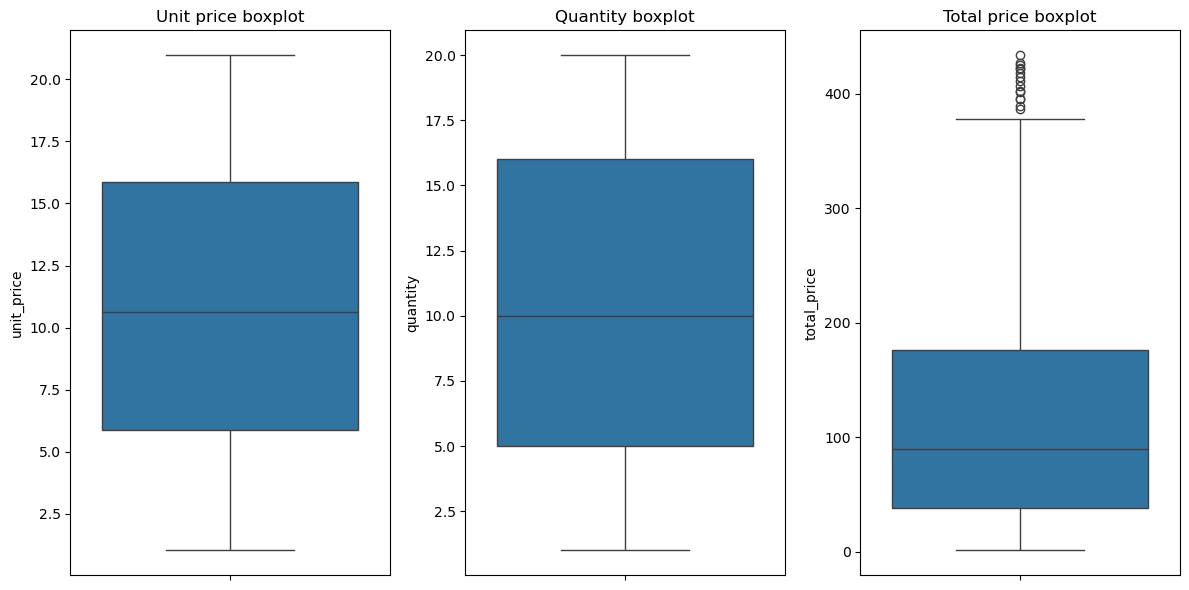

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.subplot(1, 3, 1)
sns.boxplot(data['unit_price'])
plt.title("Unit price boxplot")
plt.subplot(1, 3, 2)
sns.boxplot(data['quantity'])
plt.title("Quantity boxplot")
plt.subplot(1, 3, 3)
sns.boxplot(data['total_price'])
plt.title("Total price boxplot")
plt.tight_layout()
plt.show()

After checking for the outliers, correcting the outliers which might distort the analysis.

In [29]:
q1 = data['total_price'].quantile(0.25)
q3 = data['total_price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers_total_price = data[(data['total_price'] < lower_bound) | (data['total_price'] > upper_bound)]
print(f"Outliers in total price:\n{outliers_total_price[['sale_id', 'total_price', 'unit_price', 'quantity']]}")

Outliers in total price:
     sale_id  total_price  unit_price  quantity
56        57       414.94       20.41        19
57        58       427.14       19.96        20
134      135       418.39       20.58        19
156      157       402.11       18.79        20
160      161       425.10       20.91        19
260      261       407.01       20.02        19
331      332       395.41       20.53        18
364      365       395.22       19.44        19
521      522       389.63       20.23        18
621      622       423.08       19.77        20
760      761       421.64       20.74        19
811      812       387.29       19.05        19
812      813       411.28       20.23        19
902      903       402.92       20.92        18
957      958       433.99       20.28        20


In [27]:
from scipy.stats import zscore
data_zscore = data[['total_price']]
z_scores = zscore(data_zscore)
outliers_zscore = data[abs(z_scores) > 3]
print(f"Outliers based on z-score:\n {outliers_zscore[['sale_id', 'total_price', 'unit_price', 'quantity']]}")

Outliers based on z-score:
      sale_id  total_price  unit_price  quantity
0        NaN          NaN         NaN       NaN
1        NaN          NaN         NaN       NaN
2        NaN          NaN         NaN       NaN
3        NaN          NaN         NaN       NaN
4        NaN          NaN         NaN       NaN
..       ...          ...         ...       ...
995      NaN          NaN         NaN       NaN
996      NaN          NaN         NaN       NaN
997      NaN          NaN         NaN       NaN
998      NaN          NaN         NaN       NaN
999      NaN          NaN         NaN       NaN

[1000 rows x 4 columns]


In [31]:
data_cleaned = data[(data['total_price'] >= lower_bound) & (data['total_price'] <= upper_bound)]
print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")

Original data shape: (1000, 12)
Cleaned data shape: (985, 12)


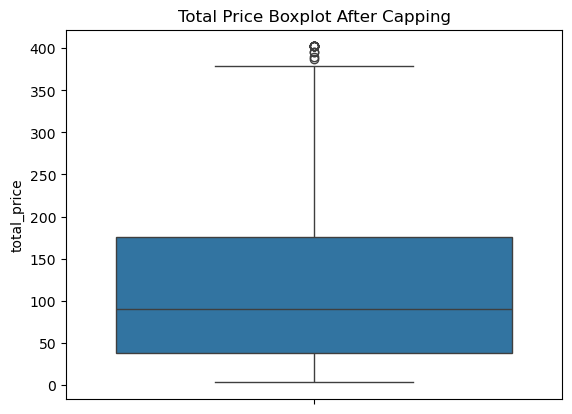

In [33]:
# Cap the outliers in 'total_price' to the 1st and 99th percentile
lower_limit = data['total_price'].quantile(0.01)
upper_limit = data['total_price'].quantile(0.99)

data['total_price'] = data['total_price'].clip(lower=lower_limit, upper=upper_limit)

# Check the result by plotting again
sns.boxplot(data['total_price'])
plt.title('Total Price Boxplot After Capping')
plt.show()

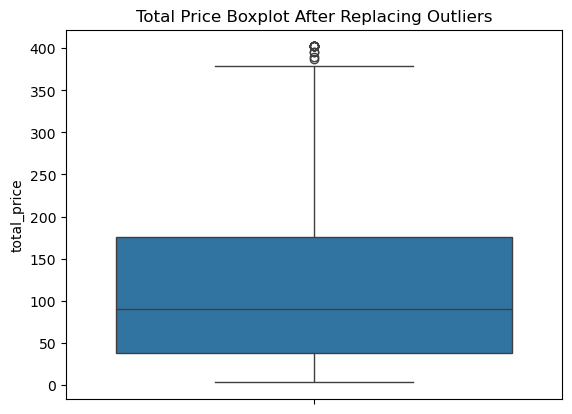

In [35]:
# Replace outliers with the median of the column
median_value = data['total_price'].median()
data['total_price'] = data['total_price'].apply(lambda x: median_value if x > upper_limit else x)

# Check the result by plotting again
sns.boxplot(data['total_price'])
plt.title('Total Price Boxplot After Replacing Outliers')
plt.show()

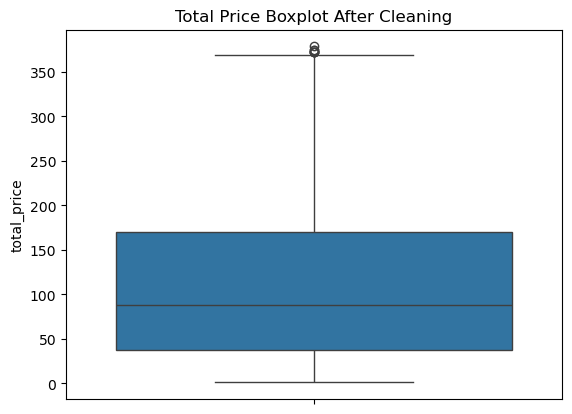

count    985.000000
mean     114.140863
std       93.910229
min        1.210000
25%       37.710000
50%       87.900000
75%      170.340000
max      378.530000
Name: total_price, dtype: float64


In [37]:
# Check the distribution after handling outliers
sns.boxplot(data_cleaned['total_price'])
plt.title('Total Price Boxplot After Cleaning')
plt.show()

# Check summary statistics after cleaning
print(data_cleaned['total_price'].describe())


In [39]:
#Feature engineering 
#Creating new columns like total sales per product
data['calculated_total'] = data['quantity'] * data['unit_price']

Exploratory data analysis.

In [43]:
#EDA

#Summary stats
data.describe()

,sale_id,unit_price,quantity,tax,total_price,reward_points,calculated_total
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,10.836110,10.337000,7.758010,118.429426,6.057000,110.825890
std,288.819436,5.775924,6.029908,6.538066,99.439342,9.350464,93.398376
min,1.000000,1.020000,1.000000,0.080000,3.229500,0.000000,1.130000
25%,250.750000,5.867500,5.000000,2.510000,38.380000,0.000000,35.870000
50%,500.500000,10.615000,10.000000,5.870000,89.705000,0.000000,83.835000
75%,750.250000,15.882500,16.000000,11.522500,176.072500,10.000000,164.550000
max,1000.000000,20.980000,20.000000,28.390000,402.118100,43.000000,405.600000


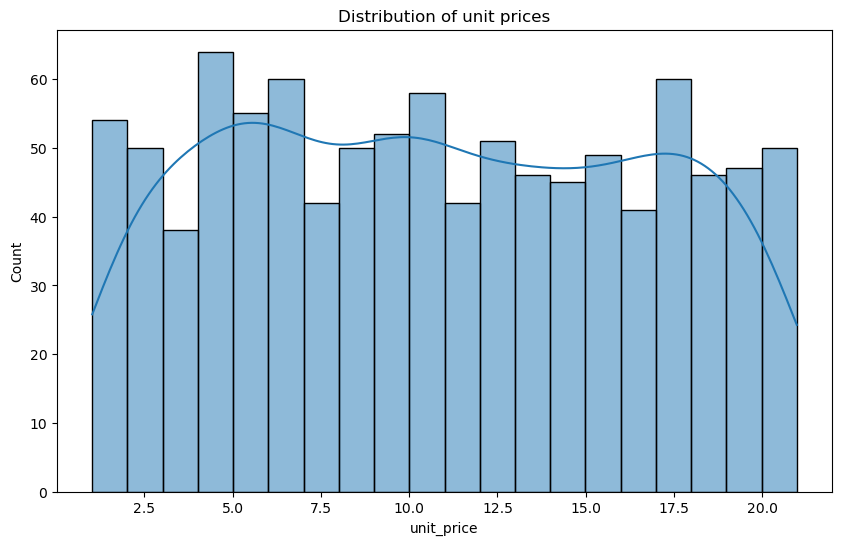

In [45]:
#Visualize distributions of key numerical columns 
plt.figure(figsize = (10, 6))
sns.histplot(data['unit_price'], bins = 20, kde = True)
plt.title("Distribution of unit prices")
plt.show()

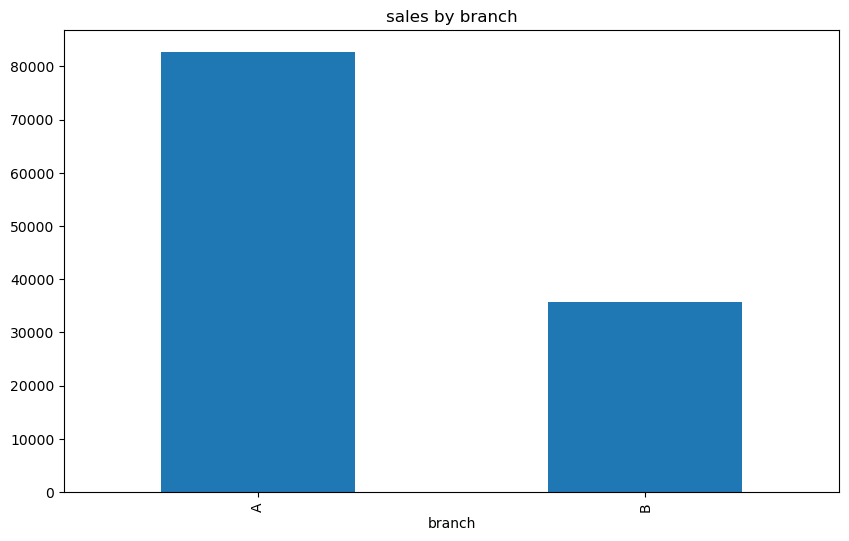

In [57]:
#Sales analysis by grouping the columns
#By branch
branch_sales = data.groupby('branch')['total_price'].sum().sort_values(ascending = False)
branch_sales.plot(kind = 'bar', figsize = (10, 6))
plt.title("sales by branch")
plt.show()

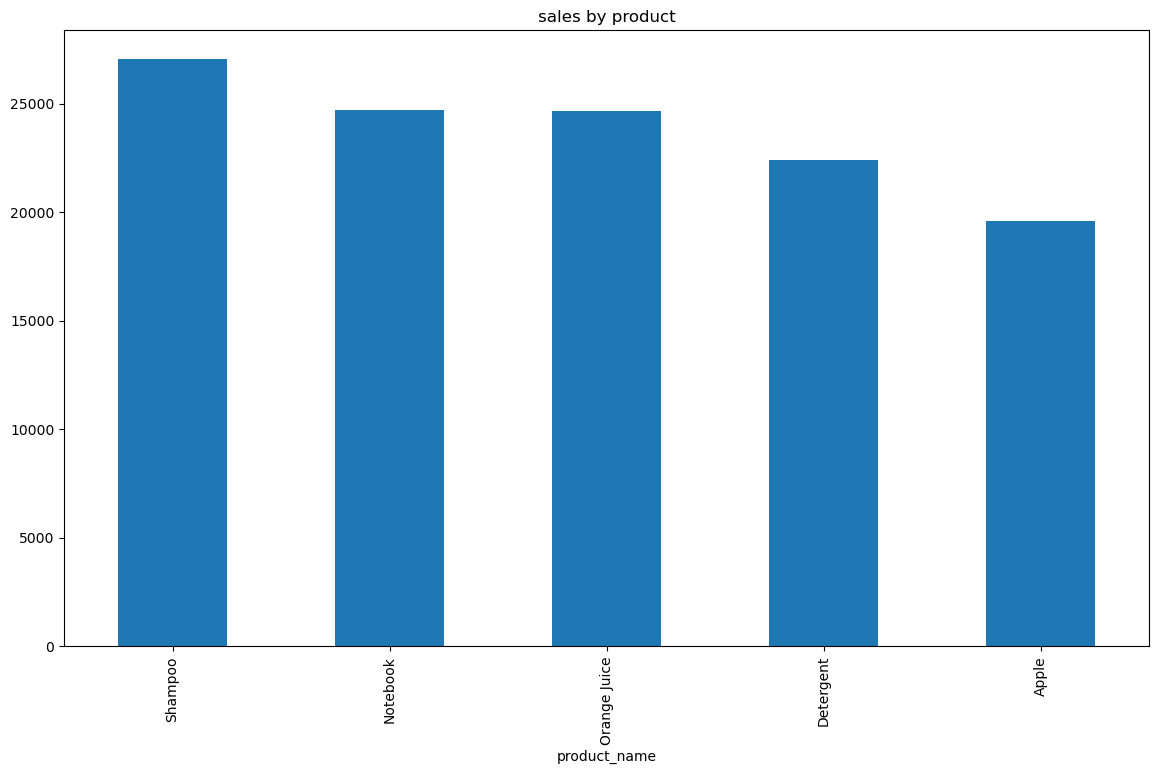

In [59]:
#By product
product_sales = data.groupby('product_name')['total_price'].sum().sort_values(ascending = False)
product_sales.plot(kind = 'bar', figsize = (14, 8))
plt.title("sales by product")
plt.show()

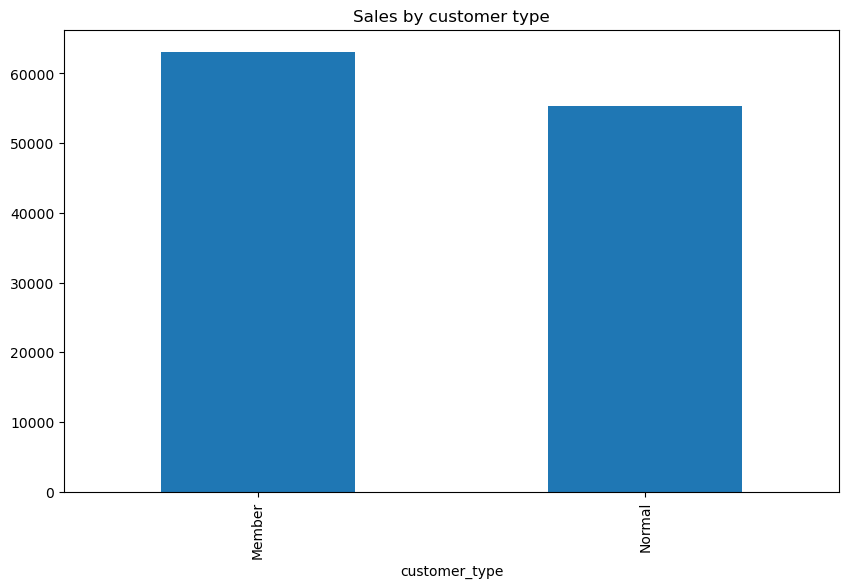

In [75]:
#By customer type
customer_sales = data.groupby('customer_type')['total_price'].sum().sort_values(ascending=False)
customer_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Sales by customer type')
plt.show()

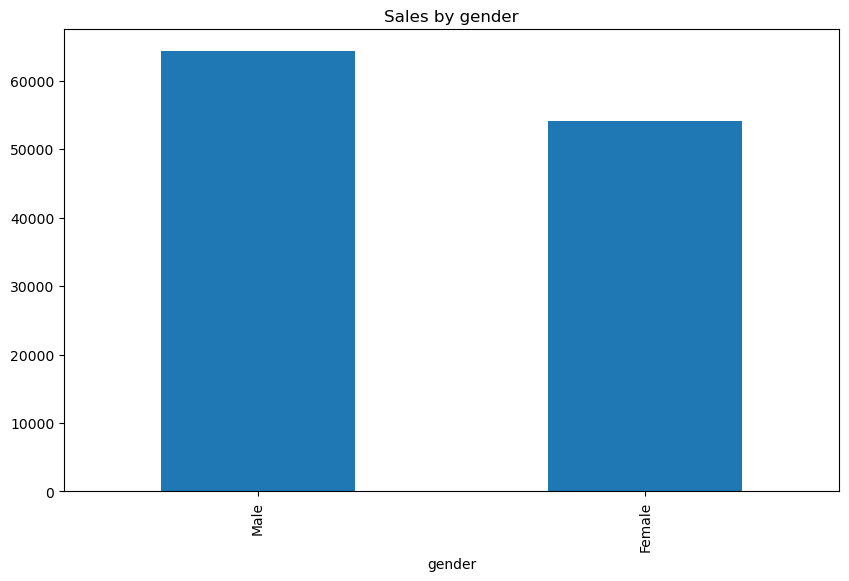

In [73]:
#By gender
gender_sales = data.groupby('gender')['total_price'].sum().sort_values(ascending=False)
gender_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Sales by gender')
plt.show()

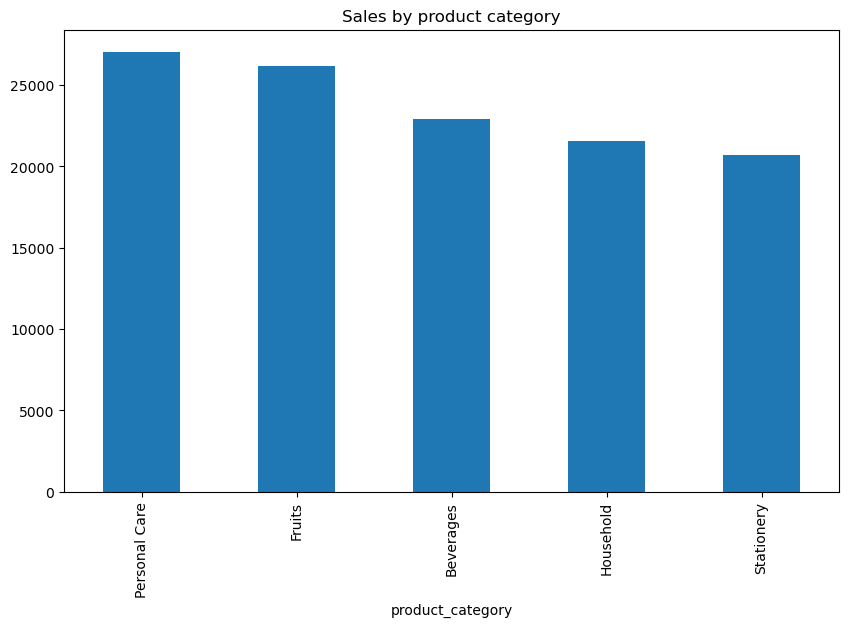

In [71]:
#By product category
category_sales = data.groupby('product_category')['total_price'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Sales by product category')
plt.show()

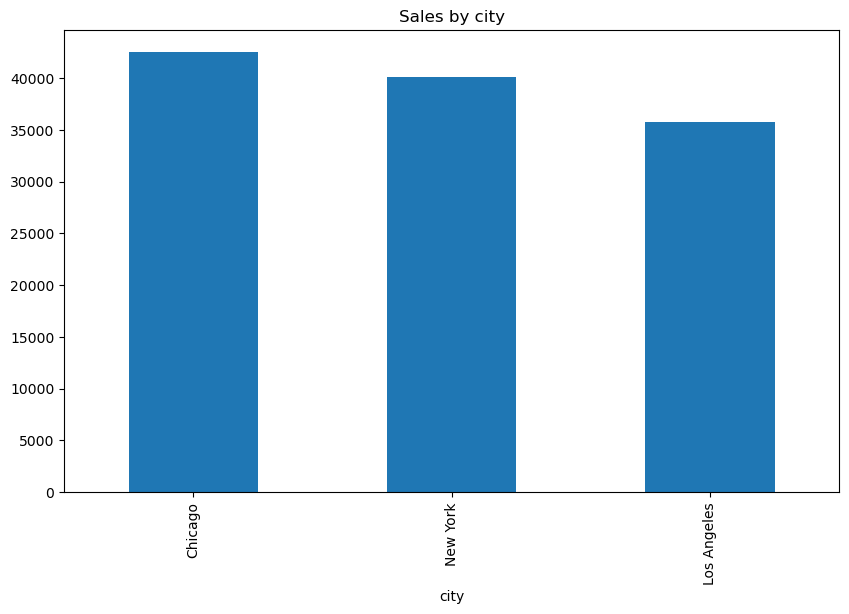

In [69]:
#By city
city_sales = data.groupby('city')['total_price'].sum().sort_values(ascending=False)
city_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Sales by city')
plt.show()

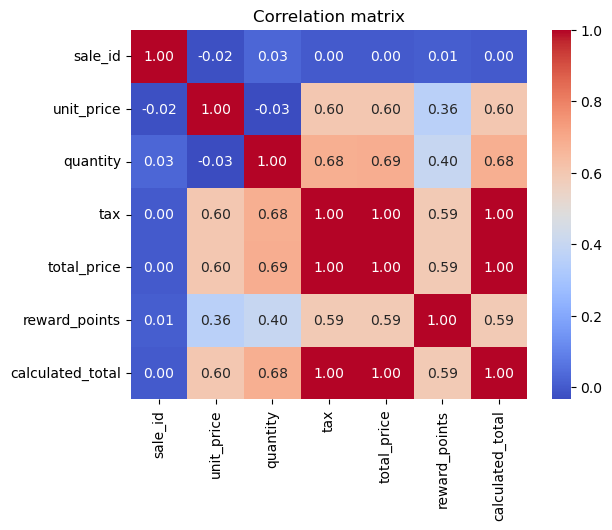

In [81]:
#Correlation matrix
num_data = data.select_dtypes(include = ['float64', 'int64'])
correlation_matrix = num_data.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation matrix')
plt.show()

In [83]:
#Predicting total sales
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features and target variable
X = data[['unit_price', 'quantity']]
y = data['total_price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
print(f'Model Accuracy: {model.score(X_test, y_test)}')

Model Accuracy: 0.8691792009240309


In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

#lets select a few features for clustering 
features = data[['total_price', 'quantity', 'unit_price', 'reward_points']]
features.fillna(features.mean(), inplace = True)

C:\Users\devar\AppData\Local\Temp\ipykernel_20612\750126846.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(features.mean(), inplace = True)


In [87]:
#normalize the data using standardscaler to bring all the features to the same scale
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)

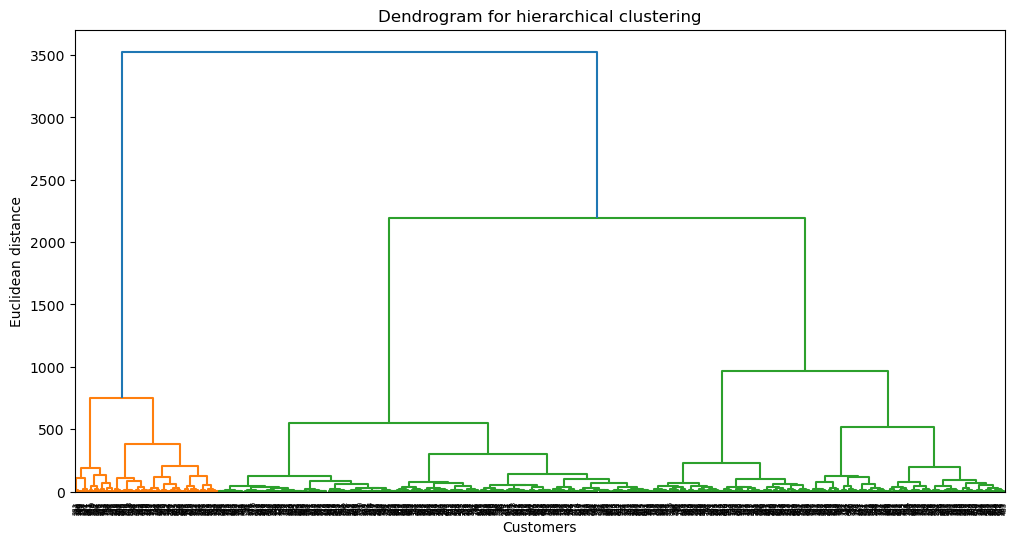

In [89]:
#create a dendrogram to visualize the linkage 
plt.figure(figsize = (12, 6))
sch.dendrogram(sch.linkage(features, method = 'ward'))
plt.title("Dendrogram for hierarchical clustering")
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

In [93]:
#apply agglomerative clustering to form clusters
agg = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')
data['cluster'] = agg.fit_predict(data_scaled)

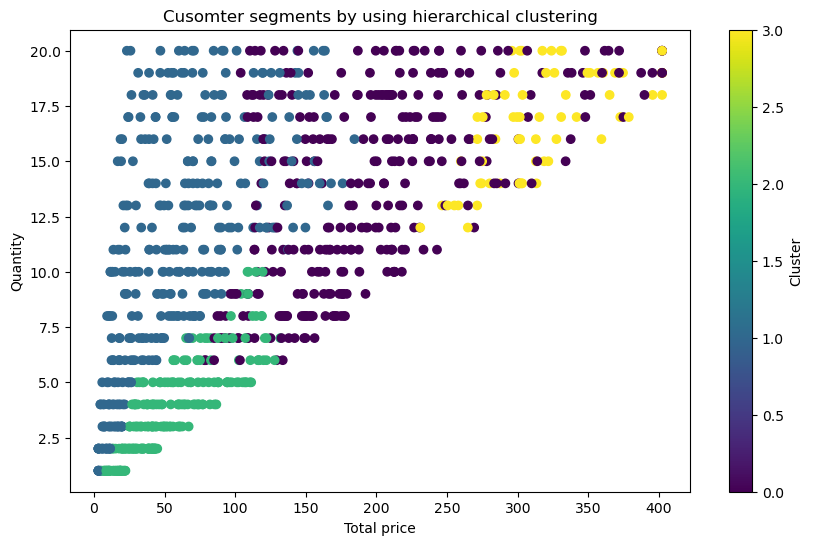

In [105]:
#visualize the clusters
plt.figure(figsize = (10, 6))
plt.scatter(data['total_price'], data['quantity'], c = data['cluster'], cmap = 'viridis')
plt.title('Cusomter segments by using hierarchical clustering')
plt.xlabel('Total price')
plt.ylabel('Quantity')
plt.colorbar(label = 'Cluster')
plt.show()

**Clustering and Color Assignment**
When we perform hierarchical clustering, we group customers based on their purchasing behavior (e.g., total_price, quantity, etc.).
Each group (or cluster) is assigned a unique label (e.g., 0, 1, 2, 3 for 4 clusters).
In the scatter plot, the c=data['cluster'] argument uses the cluster labels to color the data points (customers). The color map (cmap='viridis') is used to assign a unique color to each cluster.

**Interpretation of Colors**
Each point (representing a customer) will have a color based on its cluster assignment.
The color intensity or shade varies based on the cluster number assigned by the clustering algorithm. 
Customers in Cluster 0 might be represented by a dark purple color.
Customers in Cluster 1 might be represented by a greenish color.
Customers in Cluster 2 might be represented by a yellowish color.
Customers in Cluster 3 might be represented by a bright yellow or light green color.
These colors simply distinguish different clusters. They don't carry a meaning like specific attributes of the customers, but represent which group the customer belongs to based on their purchasing behavior.

**Customer Segments**
Each cluster represents a group of customers with similar purchasing behaviors. 
Cluster 0 (purple): Might represent customers who buy high-value products (higher total_price).
Cluster 1 (green): Could represent customers who buy a higher quantity of products but at a lower price point.
Cluster 2 (yellow): Might represent customers with lower total spending but purchasing a wide variety of products.
Cluster 3 (light yellow): Could represent customers who earn high reward points or make frequent purchases.

In [103]:
#the number of customers in each cluster
cluster_summary = data.groupby('cluster').agg(total_sales = ('total_price', 'sum'),
                                              avg_quantity = ('quantity', 'mean'),
                                              avg_unit_price = ('unit_price', 'mean'),
                                              avg_reward_points = ('reward_points', 'mean'),
                                              customer_count = ('sale_id', 'count'))
print(cluster_summary)

         total_sales  avg_quantity  avg_unit_price  avg_reward_points  \
cluster                                                                 
0         64083.8224     13.813456       13.771713           9.045872   
1         19937.9750     10.735795        4.754631           1.502841   
2         12825.1900      3.553360       13.616206           1.707510   
3         21582.4386     16.794118       17.856324          31.441176   

         customer_count  
cluster                  
0                   327  
1                   352  
2                   253  
3                    68  
